# Tropical Rainfall: Notebook for the Live Demonstration

The notebook contains examples of tropical rainfall diagnostics for the live demonstration.

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Precipitation Histograms for Low-Resolution Data](#2-comparison-of-precipitation-histograms-for-low-resolution-data)

3. [Comparison of Precipitation Histograms for High-Resolution Data](#3-comparison-of-precipitation-histograms-for-high-resolution-data)

4. [Zonally Averaged Precipitation](#3-mean-comparison)

## 1. The load of packages, modules, and data
For the demonstration, we need to load the aqua package and the Tropical_Rainfall class.

In [1]:
from aqua import Reader
from tropical_rainfall import Tropical_Rainfall

The class attributes by default are:
- The latitude band of the tropical area: **trop_lat=15**     
    
- The number of bins in the histogram: **num_of_bins=5000**
    
- The left edge of the first bin: **first_edge=0** 
    
- The width of each bin: **width_of_bin=0.5** mm/day

Let's initialize an object of the class as follows:

In [2]:
diag = Tropical_Rainfall(loglevel='warning')

⚠️ **Warning:** For now, the demonstration is machine dependent since we need to know the path to the precomputed data. Make sure to configure the path according to the machine you are using.

In [3]:
from aqua.util import ConfigPath
machine = ConfigPath().get_machine()

Loading the low-resolution arxiv:

In [4]:
reader  = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly") 
ifs_1990 = reader.retrieve(var=["mtpr"])

reader  = Reader(model="ICON", exp="historical-1990", source="lra-r100-monthly") 
icon_1990 = reader.retrieve(var=["mtpr"])

2024-05-21 00:17:26 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-05-21 00:17:27 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-05-21 00:17:27 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly


2024-05-21 00:18:02 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-05-21 00:18:48 :: Reader :: WARNING  -> You are asking for var ['mtpr'] but the fixes definition requires ['tprate'], which is not there.
2024-05-21 00:18:48 :: Reader :: WARNING  -> Retrieving ['mtpr'], but it would be safer to run with fix=False or to correct the fixes


It would be more convenient to store the loaded data in a dictionary with appropriate labels:

In [5]:
lra_data = {
    'ifs_1990': {'data': ifs_1990, 'label': 'ifs_historical-1990'},
    'icon_1990': {'data': icon_1990, 'label': 'icon_historical-1990'},
    }

## 2. Comparison of Precipitation Histograms for Low-Resolution Data

ll diagnostic outputs can be stored in either NetCDF or PDF formats. The paths to the repositories where the diagnostics store the outputs are:

In [6]:
# Please change the path to the NetCDF files and the PDF files to your own path
diag.path_to_netcdf = "./"
diag.path_to_pdf = "./"

The function `histogram` calculates and stores the histograms in a specified repository. 

In [7]:
histograms = {}

for key, value in lra_data.items():
    histograms[key] = {}
    histograms[key]["data"] = diag.histogram(value["data"],  name_of_file=value["label"])
    histograms[key]["label"] = value["label"]
histograms = diag.tools.add_colors_to_dict(loaded_dict=histograms)

The diagnostic can provide us with a graphical comparison of the obtained histograms.  

⚠️ **Warning:** The comparison with observational data is pre-calculated and loaded from storage to expedite the process. Additionally, please note that the data is precomputed and the path to the observations is machine dependent.

Specify the path to the observations based on the machine you are using:

- **On Lumi:**
    ```python
    path_to_observations = "/pfs/lustrep3/projappl/project_465000454/nazarova/observations/"
    ```
- **On Levante:**
    ```python
    path_to_observations = "/work/bb1153/b382267/observations/"
    ```



In [8]:
if machine == 'lumi':
    path_to_observations = "/pfs/lustrep3/projappl/project_465000454/nazarova/observations/"
elif machine == 'levante':
    path_to_observations = "/work/bb1153/b382267/observations/"

({<Axes: title={'center': 'r100, M, latitude band: [-15, 15]'}, xlabel='mtpr, [mm/day]', ylabel='PDF'>,
  <Figure size 800x500 with 1 Axes>},
 './trop_rainfall_lra_comparison_PDF_histogram.pdf')

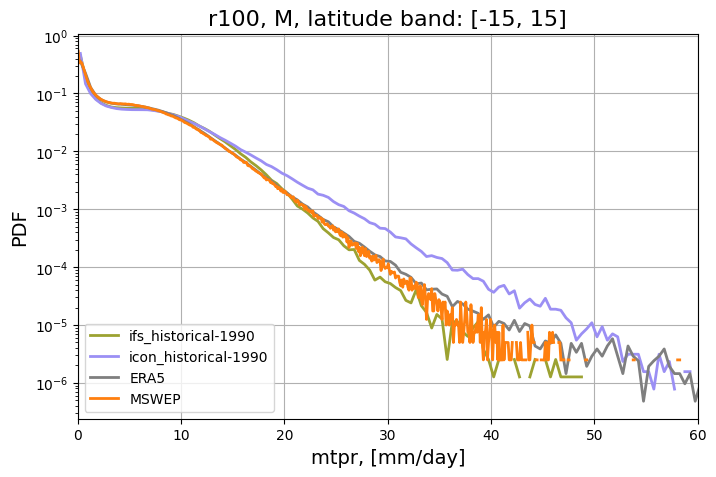

In [9]:
add = None
name_of_file = 'lra_comparison'

for key, value in histograms.items():
    add, path_to_pdf = diag.histogram_plot(value["data"],   add=add, figsize=1, pdf=True, save=False, smooth=True,
                xlogscale=False, ylogscale=True, color=value["color"], name_of_file=name_of_file,
                loc='upper right', xmax=60,
                legend=value["label"])


plot_title = 'r100, M, latitude band: [-15, 15]'
era5_merged =  diag.tools.open_dataset(path_to_observations+'ERA5/r100/M/trop_rainfall_r100_M_histogram_0-0_5000-0_10000_1990-01-01T00_2021-12-01T00.nc')
diag.histogram_plot(era5_merged, add=add, pdf=True,  color='tab:grey', legend="ERA5",  linewidth=2, name_of_file=name_of_file,
                    plot_title=plot_title, loc='lower left', figsize=1.2, smooth=True)
mswep_merged =  diag.tools.open_dataset(path_to_observations+'MSWEP/r100/M/trop_rainfall_r100_M_histogram_0-0_500-0_5000_1990-01-01T00_2020-11-01T00.nc')
diag.histogram_plot(mswep_merged, add=add, pdf=True,  color='tab:orange', legend="MSWEP",  linewidth=2, name_of_file=name_of_file,
                    plot_title=plot_title, loc='lower left', figsize=1.2, smooth=True)


## 3. Comparison of Precipitation Histograms for High-Resolution Data

⚠️ **Warning:** It is time- and memory-consuming to calculate histograms for high-resolution data. For example, analyses at a 10 km resolution with a 3-hourly frequency typically require 8 cores and 300 GB of memory. For a month's worth of data, these calculations can take about 20 minutes. Therefore, let's simply load the pre-computed results and plot them. Please note that the data is precomputed and the path to it is machine dependent.

Specify the path to the output based on the machine you are using:

- **On Lumi:**
    ```python
    path_to_output = "/pfs/lustrep3/projappl/project_465000454/nazarova/output/"
    ```
- **On Levante:**
    ```python
    path_to_output = "/work/bb1153/b382267/output/"
    ```


In [10]:
if machine == 'lumi':
    path_to_output = "/pfs/lustrep3/projappl/project_465000454/nazarova/output/"
elif machine == 'levante':
    path_to_output = "/work/bb1153/b382267/output/"

A graphical comparison for 10 km and 3-hourly data for the tropical band from -10 to 10 degrees latitude with MSWEP data is shown below

({<Axes: title={'center': 'r010, 3H, latitude band: [-15, 15]'}, xlabel='mtpr, [mm/day]', ylabel='PDF'>,
  <Figure size 960x600 with 1 Axes>},
 './trop_rainfall_highres_comparison_PDF_histogram.pdf')

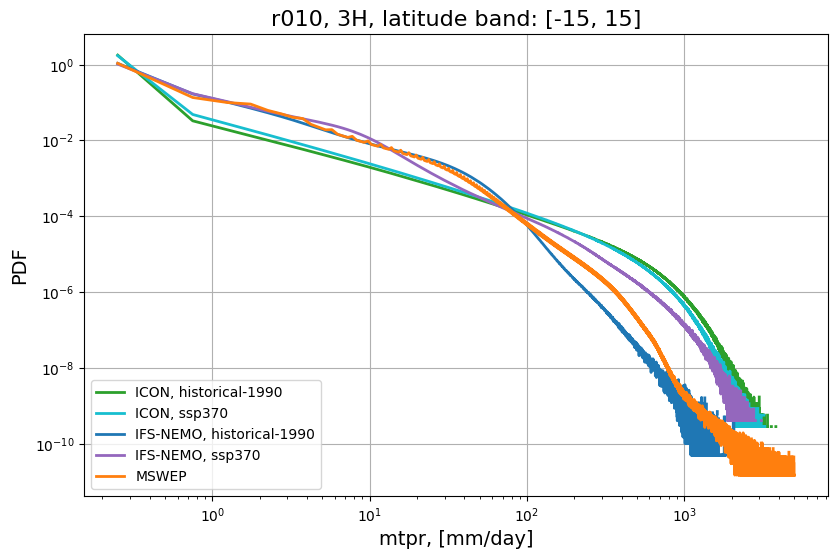

In [11]:
plot_title = 'r010, 3H, latitude band: [-15, 15]'
name_of_file = 'highres_comparison'
xlogscale = True

mswep_merged =  diag.tools.open_dataset(path_to_observations+'MSWEP/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_1980-01-01T00_2020-12-31T00_3H.nc')
icon_merged = diag.tools.open_dataset(path_to_output+'netcdf/ICON_historical-1990/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_1992-02-29T21_3H.nc')
ifs_merged = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_historical-1990/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_2002-02-28T21_3H.nc')
icon_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/ICON_ssp370/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_2020-01-01T00_2022-02-28T21_3H.nc')
ifs_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_ssp370/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_2028-07-01T00_2029-12-31T21_3H.nc')

add, _ = diag.histogram_plot(icon_merged,
                            pdf=True, legend="ICON, historical-1990", color='tab:green', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True, plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(icon_ssp370, add=add,
                            pdf=True, legend="ICON, ssp370", color='tab:cyan', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True,  plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(ifs_merged, add=add,
                            pdf=True, legend="IFS-NEMO, historical-1990", color='tab:blue', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
add, path_to_generated_plot = diag.histogram_plot(ifs_ssp370, add=add,
                            pdf=True, legend="IFS-NEMO, ssp370", color='tab:purple', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
diag.histogram_plot(mswep_merged, add=add, pdf=True,  color='tab:orange', legend="MSWEP",  linewidth=2, name_of_file=name_of_file,
                    plot_title=plot_title, loc='lower left', figsize=1.2, smooth=True, xlogscale=xlogscale)

A graphical comparison of 10 km and 3-hourly data for the tropical band from -45 to 45 degrees latitude with MSWEP data is presented below

({<Axes: title={'center': 'r010, 3H, latitude band: [-45, 45]'}, xlabel='mtpr, [mm/day]', ylabel='PDF'>,
  <Figure size 960x600 with 1 Axes>},
 './trop_rainfall_highres_comparison_PDF_histogram.pdf')

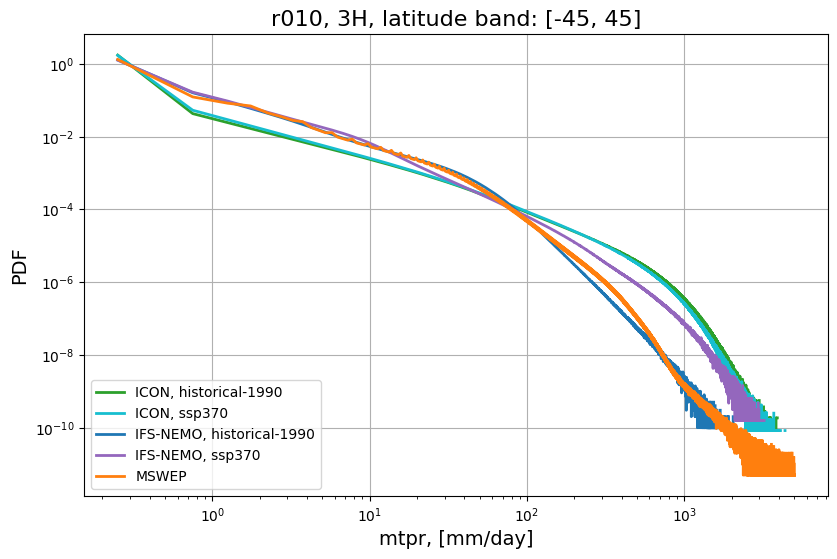

In [12]:
plot_title = 'r010, 3H, latitude band: [-45, 45]'
xlogscale = True
name_of_file = 'highres_comparison'

mswep_merged =  diag.tools.open_dataset(path_to_observations+'MSWEP/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_1979-01-01T09_2020-12-31T00_3H.nc')
icon_merged = diag.tools.open_dataset(path_to_output+'netcdf/ICON_historical-1990/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_1992-03-31T21_3H.nc')
ifs_merged = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_historical-1990/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_1992-01-31T21_3H.nc')
icon_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/ICON_ssp370/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_2022-03-01T00_2024-08-31T21_3H.nc')
ifs_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_ssp370/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_2030-02-01T00_2031-05-31T21_3H.nc')

add, _ = diag.histogram_plot(icon_merged,
                            pdf=True, legend="ICON, historical-1990", color='tab:green', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True, plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(icon_ssp370, add=add,
                            pdf=True, legend="ICON, ssp370", color='tab:cyan', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True, plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(ifs_merged, add=add,
                            pdf=True, legend="IFS-NEMO, historical-1990", color='tab:blue', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
add, path_to_generated_plot = diag.histogram_plot(ifs_ssp370, add=add,
                            pdf=True, legend="IFS-NEMO, ssp370", color='tab:purple', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
diag.histogram_plot(mswep_merged, add=add, pdf=True,  color='tab:orange', legend="MSWEP",  linewidth=2, name_of_file=name_of_file,
                    plot_title=plot_title, loc='lower left', figsize=1.2, smooth=True, xlogscale=xlogscale)

## 4. Zonally Averaged Precipitation

The diagnostic can also give us a graphical comparison of the mean value along different coordinates. 

For example, the function `plot_of_average()` calculates the mean value of precipitation during 
 - December-January-February (`DJF`), 
 - March-April-May (`MAM`), 
 - June-July-August (`JJA`), 
 - September-October-November (`SON`), and 
- for the total period of time. 

Then the function  `average_into_netcdf(coord='lon')` calculates the mean value of precipitation along the longitude. 

Let's calculate and display zonally averaged precipitation for low-resolution data across various longitudes:

In [13]:
seasonal_average_lon = {}

for key, value in lra_data.items():
    seasonal_average_lon[key] = {}
    seasonal_average_lon[key]["path"] = diag.average_into_netcdf(value["data"], coord='lon', trop_lat=90, path_to_netcdf=diag.path_to_netcdf+'mean/', 
                                                                 name_of_file=value["label"])
    seasonal_average_lon[key]["label"] = value["label"]

seasonal_average_lon = diag.tools.update_dict_of_loaded_analyses(loaded_dict=seasonal_average_lon)


seasonal_average_lon['era5'] = {}
seasonal_average_lon['era5']["path"] = path_to_observations+"ERA5/r100/M/mean/trop_rainfall_r100_M_lon_1940-09-01T00_2023-11-01T06_M.nc"
seasonal_average_lon['era5']["label"] = 'ERA5 (1940-2023)'
seasonal_average_lon['mswep'] = {}
seasonal_average_lon['mswep']["path"] = path_to_observations+"MSWEP/r100/M/mean/trop_rainfall_r100_M_lon_1979-09-01T00_2020-11-01T00_M.nc"
seasonal_average_lon['mswep']["label"] = 'MSWEP (1979-2020)'
seasonal_average_lon = diag.tools.update_dict_of_loaded_analyses(loaded_dict=seasonal_average_lon)

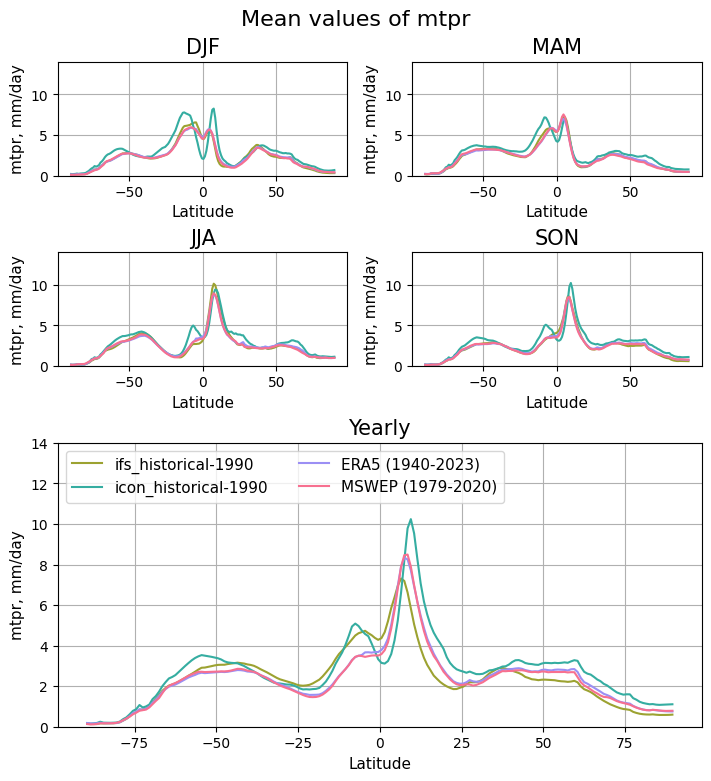

In [14]:
fig, add = None, None
for key, value in seasonal_average_lon.items():
    add = diag.plot_of_average(data=value["data"],   fig=add, figsize=0.7, ymax=14, save=False,
                color=value["color"], loc='upper left', name_of_file= 'lra_comparison',
                legend=value["label"])

##### The end